In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cleaned_cust_data  = pd.read_excel("../input/feature-engineering/cleaned_cust_data.xlsx")
cleaned_cust_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_cust_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title
0,31,1,1.00,Z001,nan
1,32,2,1.00,Z005,nan
2,34,4,1.00,Z005,nan
3,35,5,1.00,Z005,nan
4,42,7,1.00,Z008,nan


In [4]:
cleaned_jtd_data  = pd.read_csv("../input/feature-engineering/cleaned_jtd_data.csv")
cleaned_jtd_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_jtd_data.head()

,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.20,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.00,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.00,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.00,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.00,EA,10691.63


In [5]:
cleaned_plant_data  = pd.read_excel("../input/feature-engineering/cleaned_plant_data.xlsx")
cleaned_plant_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_plant_data.head()

,Plant,Name 1,House number and street,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,"No.117 Poonamallee High Road,",600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,"C-118, Phase 07,",160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,"Unit No.3, Kothari Compound,",400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,"18/1, C Site 4, Sahibabad",201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,"#75, Sy.No. 83/2, Panathur Mai",560087,Bengaluru,MFCB,Karnataka


In [6]:
modified_invoice_data = pd.read_csv("../input/feature-engineering/modified_invoice_data.csv")
modified_invoice_data.drop(['Unnamed: 0'],1,inplace=True)
modified_invoice_data.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars,Month,Year,Day,Season
0,4,Retail,E4981,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai,13-15,4,2012,1,Summer
1,5,Retail,10,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai,7-9,4,2012,2,Summer
2,6,Retail,7,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad,10-12,4,2012,2,Summer
3,7,Retail,11,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik,10-12,4,2012,2,Summer
4,8,Retail,E12096,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik,10-12,4,2012,2,Summer


1) From where most of the Data has been collected?

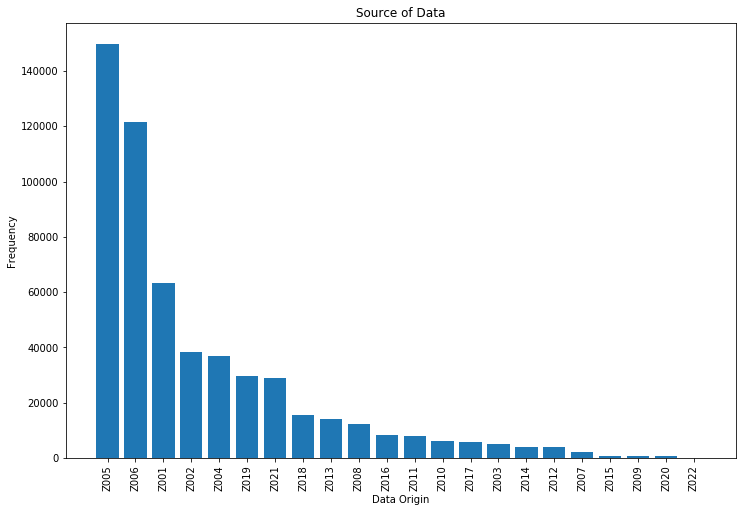

In [7]:
plt.figure(figsize= (12,8))
plt.bar(cleaned_cust_data['Data Origin'].value_counts().index, cleaned_cust_data['Data Origin'].value_counts().values)
plt.xticks(rotation = 90)
plt.title("Source of Data")
plt.xlabel("Data Origin")
plt.ylabel("Frequency")
plt.show()

Majority of customers comes through: 1) Reference - Customer, 2) Reference - Employee, 3) Outdoor Camping

2) Which are the most car types that comes for the service?

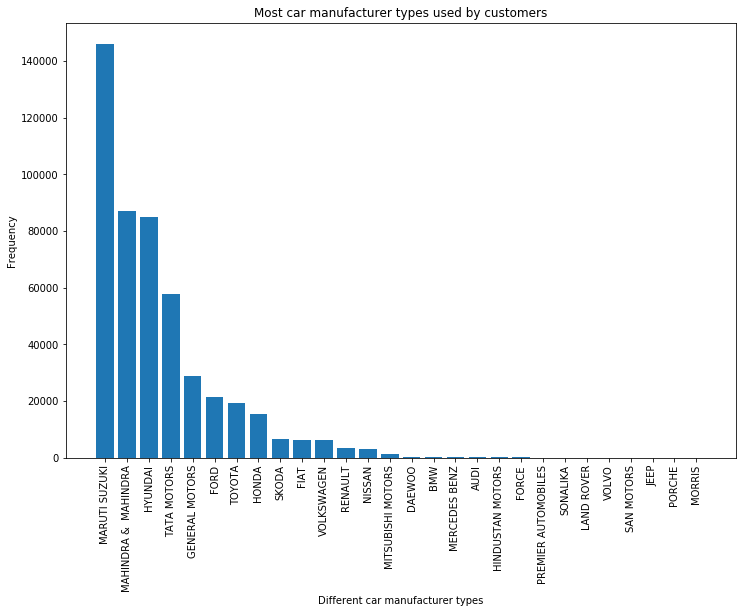

In [8]:
plt.figure(figsize= (12,8))
plt.bar(modified_invoice_data['Make'].value_counts().index, modified_invoice_data['Make'].value_counts().values)
plt.xticks(rotation = 90)
plt.title("Most car manufacturer types used by customers")
plt.xlabel("Different car manufacturer types")
plt.ylabel("Frequency")
plt.show()

We can see that Maruti Suzuki followed M&M and Hyundai which are most car type used by customers coming for the service

3) Which are the most Customer type that visits for the service?

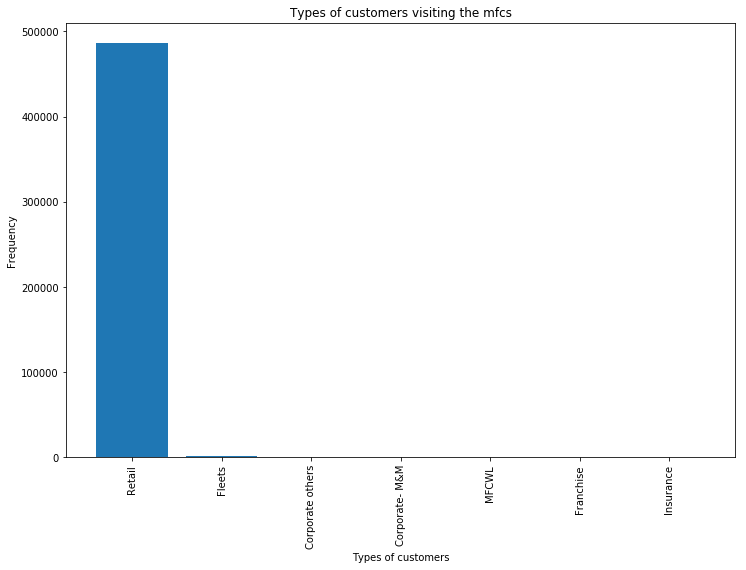

In [9]:
plt.figure(figsize= (12,8))
plt.bar(modified_invoice_data['Cust Type'].value_counts().index, modified_invoice_data['Cust Type'].value_counts().values)
plt.xticks(rotation = 90)
plt.title("Types of customers visiting the mfcs")
plt.xlabel("Types of customers")
plt.ylabel("Frequency")
plt.show()

It can be seen that data consist 99% of Retail customer type

4) What are the most type of orders received?

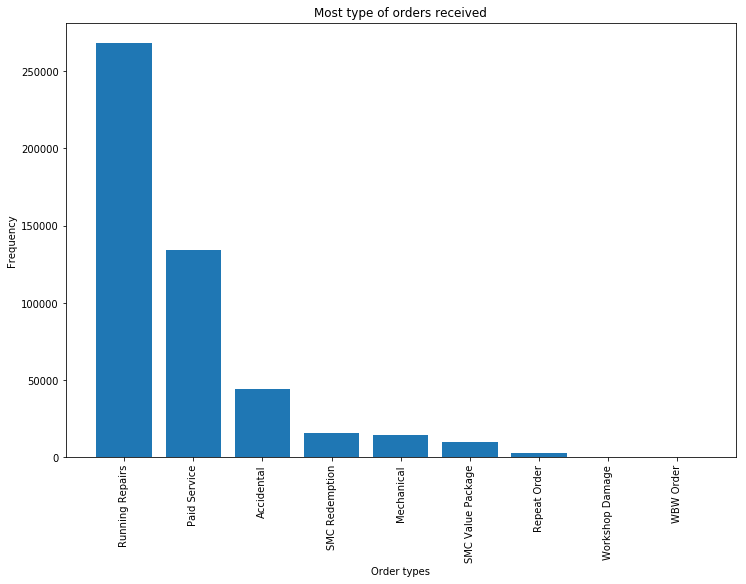

In [10]:
plt.figure(figsize= (12,8))
plt.bar(modified_invoice_data['Order Type'].value_counts().index, modified_invoice_data['Order Type'].value_counts().values)
plt.xticks(rotation = 90)
plt.title("Most type of orders received")
plt.xlabel("Order types")
plt.ylabel("Frequency")
plt.show()

5) What are the Age of cars that usually comes for the service?

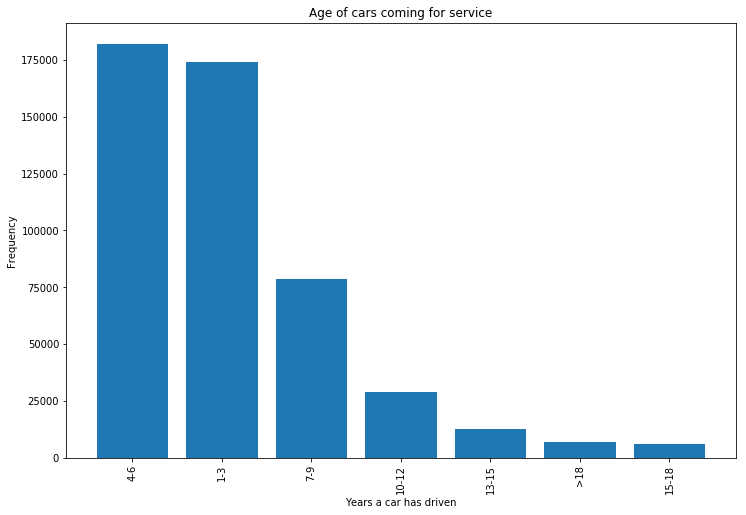

In [11]:
plt.figure(figsize= (12,8))
plt.bar(modified_invoice_data['Age of cars'].value_counts().index, modified_invoice_data['Age of cars'].value_counts().values)
plt.xticks(rotation = 90)
plt.title("Age of cars coming for service")
plt.xlabel("Years a car has driven")
plt.ylabel("Frequency")
plt.show()

6) Which are the plants who have not received order for past 1 month?

In [12]:
non_functinal_plants = modified_invoice_data[['Plant', 'JobCard Date', 'Plant Name1']].copy()

In [13]:
non_functinal_plants.head()

,Plant,JobCard Date,Plant Name1
0,BC01,2012-04-01,THANE
1,BC01,2012-04-02,THANE
2,BC04,2012-04-02,BALANAGAR
3,BC03,2012-04-02,NASHIK
4,BC03,2012-04-02,NASHIK


In [14]:
non_functinal_plants = non_functinal_plants.groupby(by='Plant').max()
non_functinal_plants.sort_values(by='JobCard Date', ascending=False).iloc[0]

JobCard Date                   2016-10-31
Plant Name1     X458 - SAIRAM AUTOMOBILES
Name: X458, dtype: object

Maximum date for which we have data is till 31-10-2016. So we will take that as base to calculate the days when last order was received by plants.

In [15]:
non_functinal_plants.head()

,JobCard Date,Plant Name1
Plant,,
BC01,2016-05-20,THANE
BC02,2015-03-20,PUNE
BC03,2016-06-02,NASHIK
BC04,2014-03-01,BALANAGAR
BC05,2016-07-01,MADEENAGUDA


In [16]:
non_functinal_plants['days'] = pd.to_datetime('2016-10-31') - pd.to_datetime(non_functinal_plants['JobCard Date'])
non_functinal_plants.head()

,JobCard Date,Plant Name1,days
Plant,,,
BC01,2016-05-20,THANE,164 days
BC02,2015-03-20,PUNE,591 days
BC03,2016-06-02,NASHIK,151 days
BC04,2014-03-01,BALANAGAR,975 days
BC05,2016-07-01,MADEENAGUDA,122 days


>> Checking for plants who had not received orders for more than 30 days.


In [17]:
non_functinal_plants = non_functinal_plants[non_functinal_plants['days']> '30 days']
non_functinal_plants.shape

(50, 3)

In [18]:
non_functinal_plants.head()

,JobCard Date,Plant Name1,days
Plant,,,
BC01,2016-05-20,THANE,164 days
BC02,2015-03-20,PUNE,591 days
BC03,2016-06-02,NASHIK,151 days
BC04,2014-03-01,BALANAGAR,975 days
BC05,2016-07-01,MADEENAGUDA,122 days


In [19]:
non_functinal_plants['days'] = non_functinal_plants['days'].astype(str)


In [20]:
non_functinal_plants.head()

,JobCard Date,Plant Name1,days
Plant,,,
BC01,2016-05-20,THANE,164 days 00:00:00.000000000
BC02,2015-03-20,PUNE,591 days 00:00:00.000000000
BC03,2016-06-02,NASHIK,151 days 00:00:00.000000000
BC04,2014-03-01,BALANAGAR,975 days 00:00:00.000000000
BC05,2016-07-01,MADEENAGUDA,122 days 00:00:00.000000000


In [21]:
non_functinal_plants['days'] = non_functinal_plants['days'].str.split(" ").str[0].astype(int)
non_functinal_plants.head()

,JobCard Date,Plant Name1,days
Plant,,,
BC01,2016-05-20,THANE,164
BC02,2015-03-20,PUNE,591
BC03,2016-06-02,NASHIK,151
BC04,2014-03-01,BALANAGAR,975
BC05,2016-07-01,MADEENAGUDA,122


In [22]:
non_functinal_plants = non_functinal_plants.sort_values(by = 'days', ascending = False)
non_functinal_plants.head()

,JobCard Date,Plant Name1,days
Plant,,,
BC11,2013-03-28,ANDHERI,1313
BC04,2014-03-01,BALANAGAR,975
BC02,2015-03-20,PUNE,591
BC27,2015-03-24,GT ROAD - LUDHIANA,587
BC21,2015-05-21,EDAPPALLY - KOCHI,529


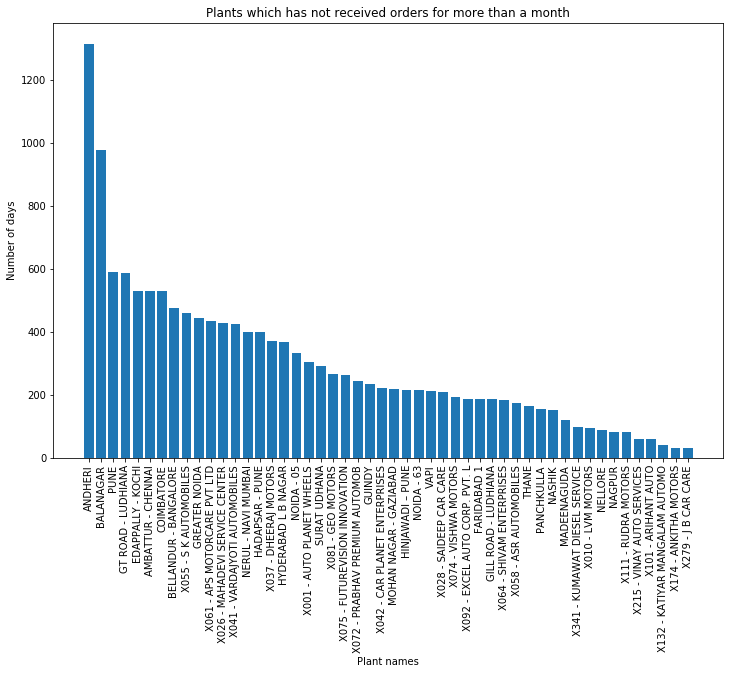

In [23]:
plt.figure(figsize=(12,8))
plt.bar(non_functinal_plants['Plant Name1'],non_functinal_plants['days'])
plt.xticks(rotation = 90)
plt.title("Plants which has not received orders for more than a month")
plt.xlabel("Plant names")
plt.ylabel("Number of days")
plt.show()

7) Which location receives most orders?

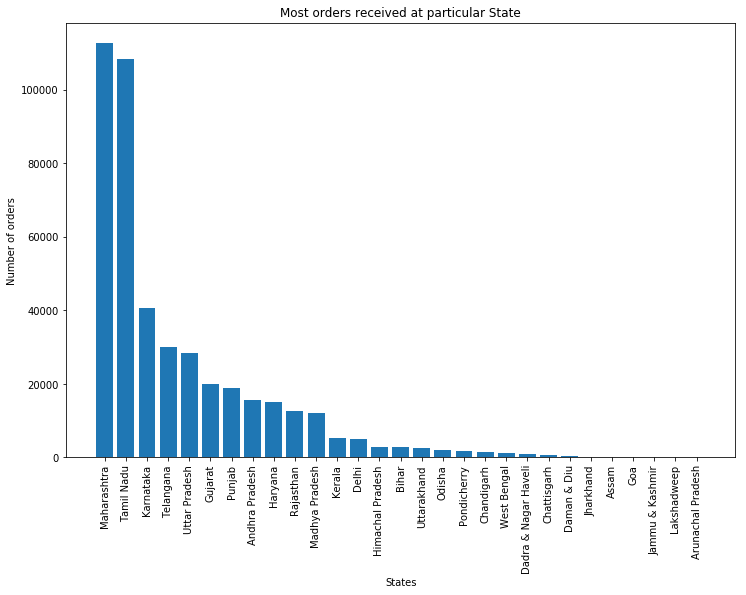

In [24]:
plt.figure(figsize=(12,8))
plt.bar(modified_invoice_data['clean_District'].value_counts().index,modified_invoice_data['clean_District'].value_counts().values)
plt.xticks(rotation = 90)
plt.title("Most orders received at particular State")
plt.xlabel("States")
plt.ylabel("Number of orders")
plt.show()

In [25]:
cities = modified_invoice_data['clean_CITY'].value_counts().head(25)

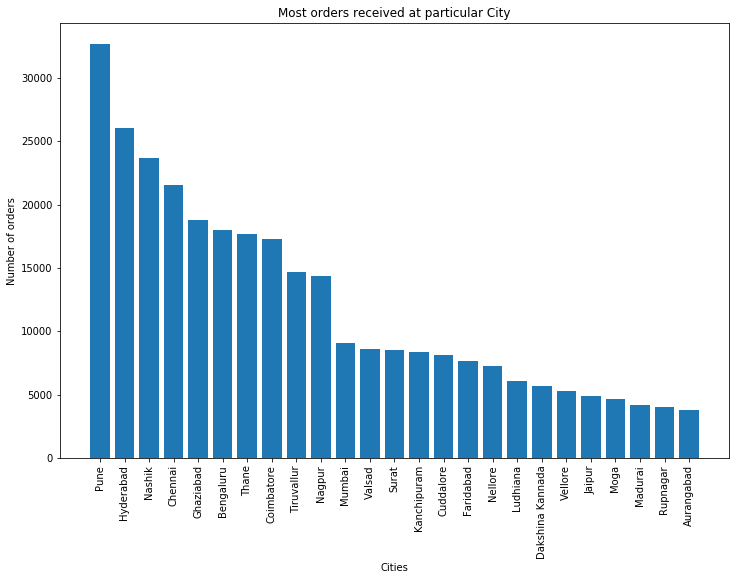

In [26]:
plt.figure(figsize=(12,8))
plt.bar(cities.index,cities.values)
plt.xticks(rotation = 90)
plt.title("Most orders received at particular City")
plt.xlabel("Cities")
plt.ylabel("Number of orders")
plt.show()

8) What are the total orders of different car manufacturer types which comes at particular location?

- We will consider only top 15 states and top 3 car manufacturer types which comes most frequently for the service.

In [27]:
district = modified_invoice_data['clean_District'].value_counts().head(15)
district = list(district.index)
district

['Maharashtra',
 'Tamil Nadu',
 'Karnataka',
 'Telangana',
 'Uttar Pradesh',
 'Gujarat',
 'Punjab',
 'Andhra Pradesh',
 'Haryana',
 'Rajasthan',
 'Madhya Pradesh',
 'Kerala',
 'Delhi',
 'Himachal Pradesh',
 'Bihar']

In [28]:
most_car_loc = modified_invoice_data.copy()
most_car_loc = most_car_loc[most_car_loc['clean_District'].isin(district)]
most_car_loc['clean_District'].nunique()

15

In [29]:
most_car_loc = most_car_loc.groupby(['clean_District','Make'], as_index=False)['Job Card No'].count()
most_car_loc.head()

,clean_District,Make,Job Card No
0,Andhra Pradesh,AUDI,10
1,Andhra Pradesh,BMW,6
2,Andhra Pradesh,DAEWOO,11
3,Andhra Pradesh,FIAT,306
4,Andhra Pradesh,FORCE,18


In [30]:
most_car_loc = most_car_loc.groupby(['clean_District']).apply(lambda x: x.sort_values(["Job Card No"], ascending = False)).reset_index(drop=True)
most_car_loc = most_car_loc.groupby('clean_District').head(3)
most_car_loc.head(10)

,clean_District,Make,Job Card No
0,Andhra Pradesh,TATA MOTORS,3912
1,Andhra Pradesh,MARUTI SUZUKI,3346
2,Andhra Pradesh,MAHINDRA & MAHINDRA,2474
24,Bihar,MAHINDRA & MAHINDRA,1445
25,Bihar,MARUTI SUZUKI,514
26,Bihar,TATA MOTORS,455
42,Delhi,MARUTI SUZUKI,1745
43,Delhi,HYUNDAI,1419
44,Delhi,MAHINDRA & MAHINDRA,708
62,Gujarat,MARUTI SUZUKI,7392


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

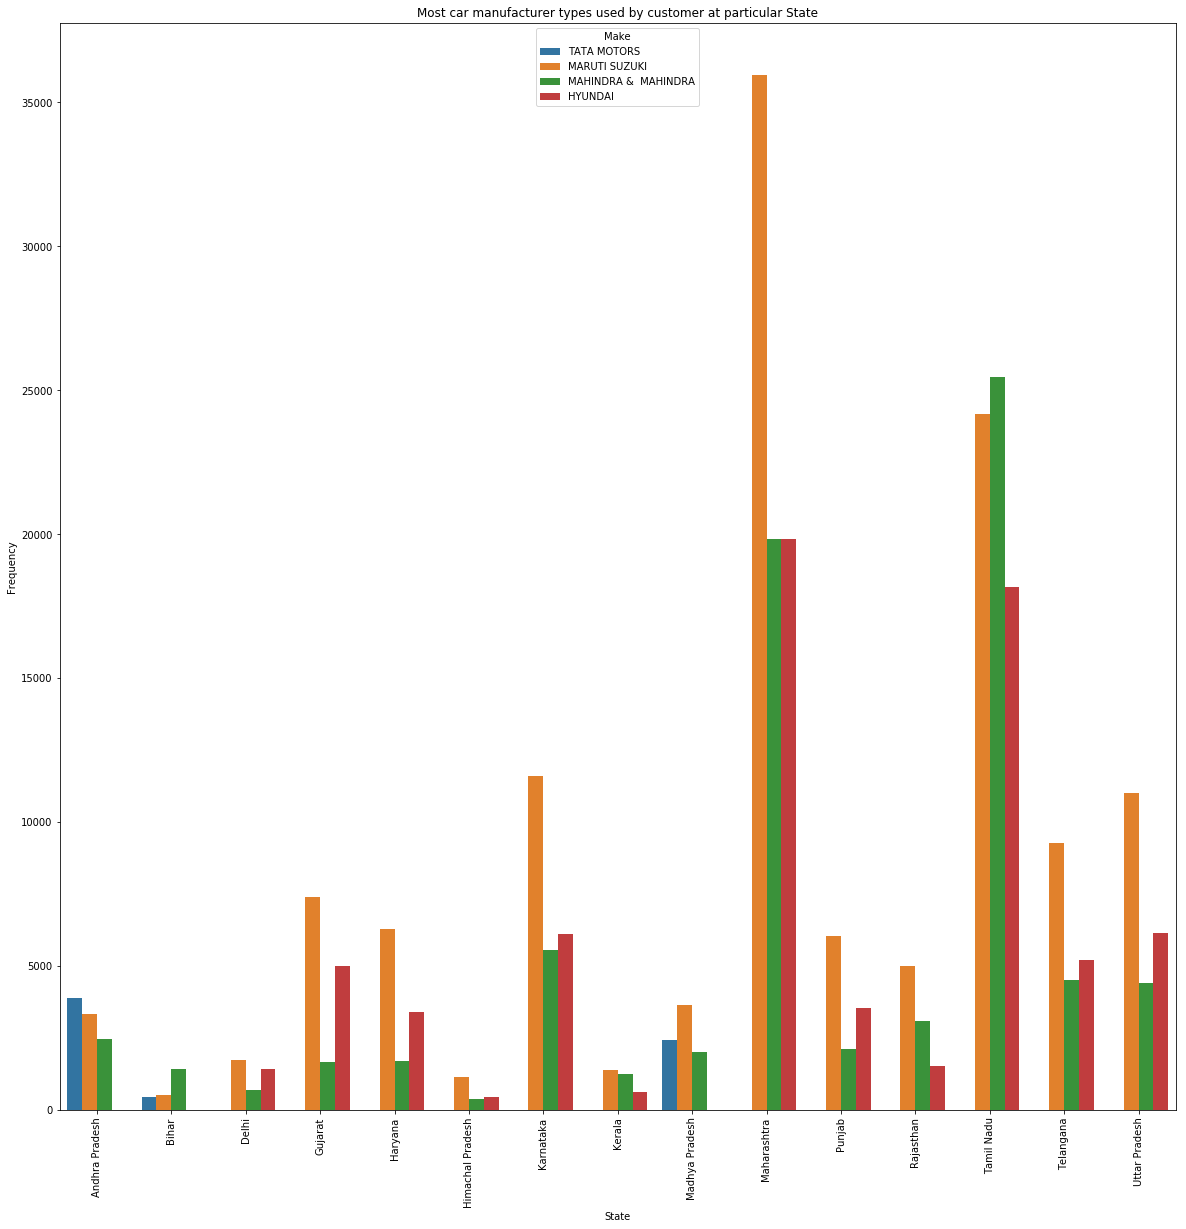

In [31]:
plt.figure(figsize=(20,20))
sns.barplot(x = 'clean_District', y = 'Job Card No', hue = 'Make', data = most_car_loc)
plt.title("Most car manufacturer types used by customer at particular State")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)

In [32]:
cities = modified_invoice_data['clean_CITY'].value_counts().head(15)
cities = list(cities.index)
cities

['Pune',
 'Hyderabad',
 'Nashik',
 'Chennai',
 'Ghaziabad',
 'Bengaluru',
 'Thane',
 'Coimbatore',
 'Tiruvallur',
 'Nagpur',
 'Mumbai',
 'Valsad',
 'Surat',
 'Kanchipuram',
 'Cuddalore']

In [33]:
most_car_loc = modified_invoice_data.copy()
most_car_loc = most_car_loc[most_car_loc['clean_CITY'].isin(cities)]
most_car_loc['clean_CITY'].nunique()

15

In [34]:
most_car_loc = most_car_loc.groupby(['clean_CITY','Make'], as_index=False)['Job Card No'].count()
most_car_loc = most_car_loc.groupby(['clean_CITY']).apply(lambda x: x.sort_values(["Job Card No"], ascending = False)).reset_index(drop=True)
most_car_loc = most_car_loc.groupby('clean_CITY').head(3)
most_car_loc.head(10)

,clean_CITY,Make,Job Card No
0,Bengaluru,MARUTI SUZUKI,4095
1,Bengaluru,HYUNDAI,3117
2,Bengaluru,MAHINDRA & MAHINDRA,2550
23,Chennai,MAHINDRA & MAHINDRA,7406
24,Chennai,HYUNDAI,3733
25,Chennai,MARUTI SUZUKI,3375
43,Coimbatore,MARUTI SUZUKI,5198
44,Coimbatore,HYUNDAI,3969
45,Coimbatore,MAHINDRA & MAHINDRA,2356
65,Cuddalore,MAHINDRA & MAHINDRA,2066


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

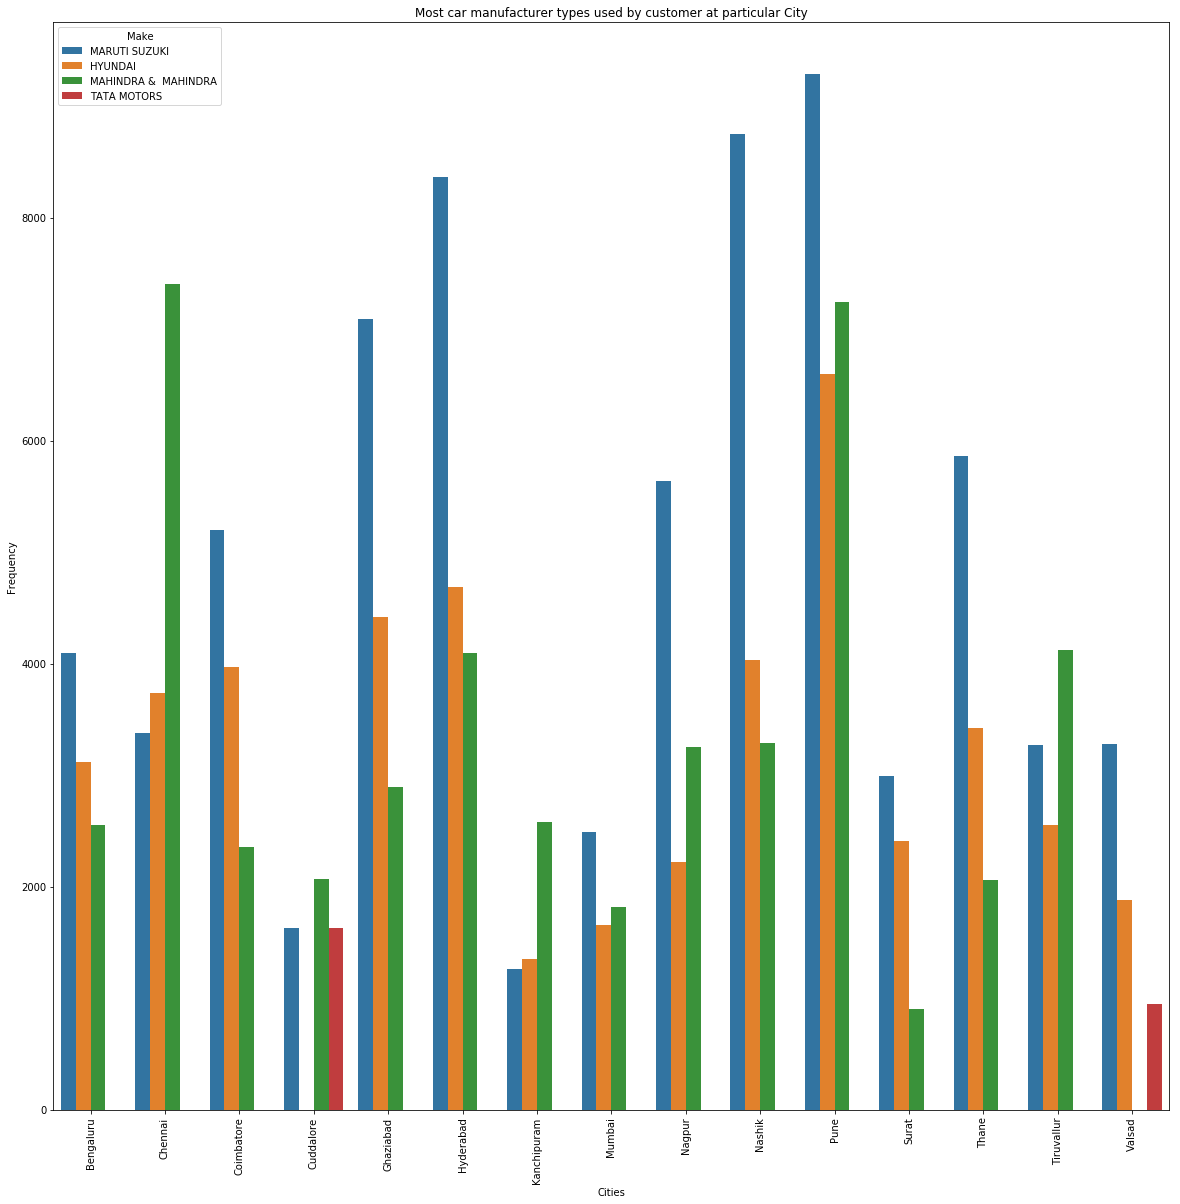

In [35]:
plt.figure(figsize=(20,20))
sns.barplot(x = 'clean_CITY', y = 'Job Card No', hue = 'Make', data = most_car_loc)
plt.title("Most car manufacturer types used by customer at particular City")
plt.xlabel("Cities")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)

9) What are the average revenue generated for particular car manufacturer and frequency of the orders for that manufacturer?

In [36]:
revenue_generated = modified_invoice_data.groupby('Make', as_index  = False)['Total Amt Wtd Tax.'].mean()
revenue_generated.head()

,Make,Total Amt Wtd Tax.
0,AUDI,9535.35
1,BMW,7549.41
2,DAEWOO,3163.81
3,FIAT,4791.38
4,FORCE,4092.02


In [37]:
count_of_orders = pd.DataFrame(modified_invoice_data['Make'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['Make','Total_orders']
count_of_orders.head()

,Make,Total_orders
0,MARUTI SUZUKI,146052
1,MAHINDRA & MAHINDRA,86872
2,HYUNDAI,84885
3,TATA MOTORS,57706
4,GENERAL MOTORS,28938


In [38]:
revenue_make_count = revenue_generated.merge(count_of_orders, on = 'Make', how = 'left')
revenue_make_count.head()

,Make,Total Amt Wtd Tax.,Total_orders
0,AUDI,9535.35,220
1,BMW,7549.41,257
2,DAEWOO,3163.81,388
3,FIAT,4791.38,6403
4,FORCE,4092.02,204


In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
revenue_make_count1 = revenue_make_count.copy()
revenue_make_count1[['Total Amt Wtd Tax.','Total_orders']] = sc.fit_transform(revenue_make_count1[['Total Amt Wtd Tax.','Total_orders']])
revenue_make_count1.head()

,Make,Total Amt Wtd Tax.,Total_orders
0,AUDI,1.00,0.00
1,BMW,0.78,0.00
2,DAEWOO,0.30,0.00
3,FIAT,0.48,0.04
4,FORCE,0.40,0.00


Text(0, 0.5, 'Revenue')

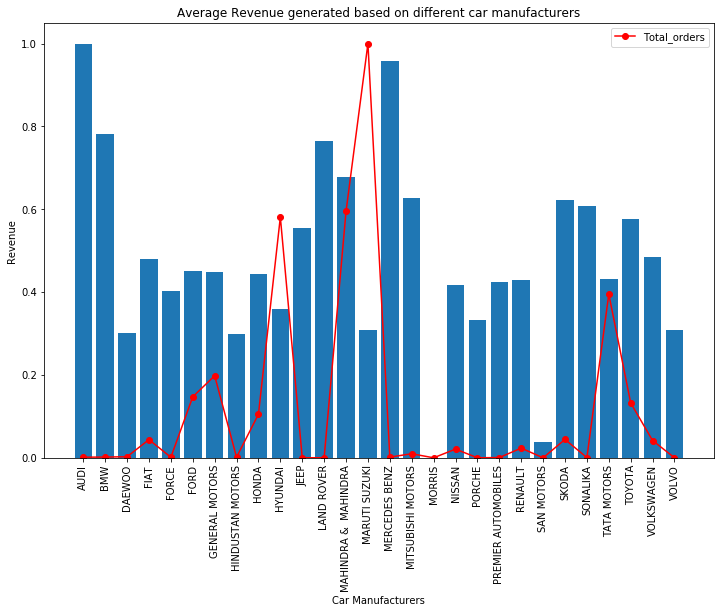

In [40]:
plt.figure(figsize=(12,8))
plt.bar(revenue_make_count1['Make'], revenue_make_count1['Total Amt Wtd Tax.'])
plt.plot(revenue_make_count1['Make'], revenue_make_count1['Total_orders'], color='red', marker='o')
plt.legend()
plt.title("Average Revenue generated based on different car manufacturers")
plt.xticks(rotation = 90)
plt.xlabel("Car Manufacturers")
plt.ylabel("Revenue")
                          

10) What is the average labour cost for different car make?

In [41]:
revenue_generated = modified_invoice_data.groupby('Make', as_index  = False)['Labour Total'].mean()

count_of_orders = pd.DataFrame(modified_invoice_data['Make'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['Make','Total_orders']

revenue_make_count = revenue_generated.merge(count_of_orders, on = 'Make', how = 'left')
revenue_make_count.head()

,Make,Labour Total,Total_orders
0,AUDI,4079.24,220
1,BMW,2762.30,257
2,DAEWOO,1291.25,388
3,FIAT,1348.20,6403
4,FORCE,1699.99,204


Text(0, 0.5, 'Count')

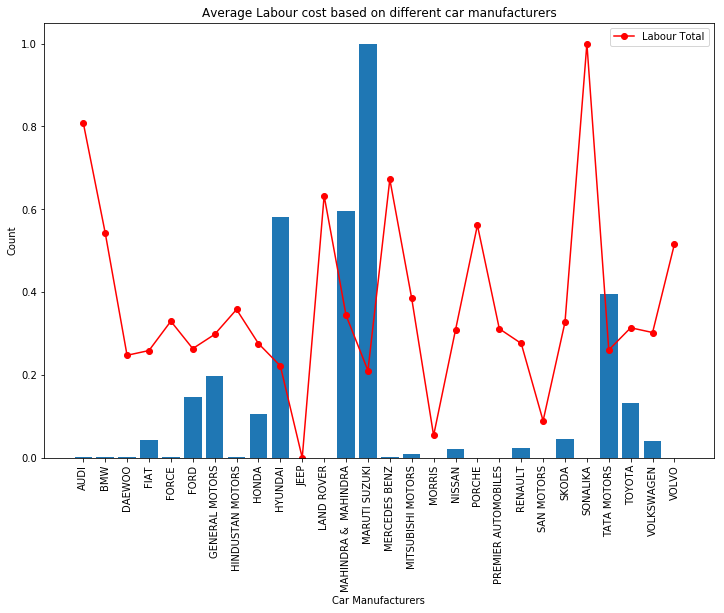

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
revenue_make_count[['Labour Total','Total_orders']] = sc.fit_transform(revenue_make_count[['Labour Total','Total_orders']])


plt.figure(figsize=(12,8))
plt.bar(revenue_make_count['Make'], revenue_make_count['Total_orders'])
plt.plot(revenue_make_count['Make'], revenue_make_count['Labour Total'], color='red', marker='o')
plt.legend()
plt.title("Average Labour cost based on different car manufacturers")
plt.xticks(rotation = 90)
plt.xlabel("Car Manufacturers")
plt.ylabel("Count")
                          

11) What is the Labour total for different location?

In [43]:
revenue_generated = modified_invoice_data.groupby('clean_District', as_index  = False)['Labour Total'].mean()

count_of_orders = pd.DataFrame(modified_invoice_data['clean_District'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['clean_District','Total_orders']

revenue_make_count = revenue_generated.merge(count_of_orders, on = 'clean_District', how = 'left')
revenue_make_count.head()

,clean_District,Labour Total,Total_orders
0,Andhra Pradesh,1671.20,15700
1,Arunachal Pradesh,480.93,1
2,Assam,851.85,91
3,Bihar,1945.81,2845
4,Chandigarh,975.86,1488


Text(0, 0.5, 'Count')

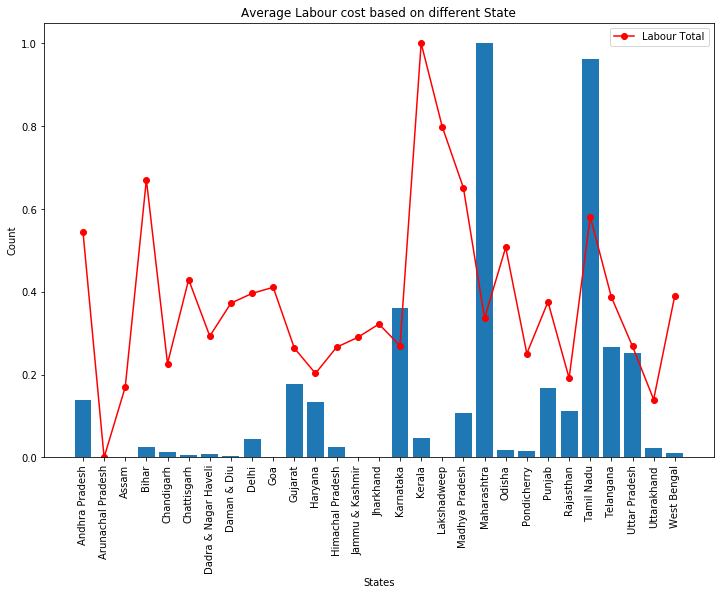

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
revenue_make_count[['Labour Total','Total_orders']] = sc.fit_transform(revenue_make_count[['Labour Total','Total_orders']])


plt.figure(figsize=(12,8))
plt.bar(revenue_make_count['clean_District'], revenue_make_count['Total_orders'])
plt.plot(revenue_make_count['clean_District'], revenue_make_count['Labour Total'], color='red', marker='o')
plt.legend()
plt.title("Average Labour cost based on different State")
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Count")

12) What is the average revenue generated for order types?

In [45]:
revenue_generated = modified_invoice_data.groupby('Order Type', as_index  = False)['Total Amt Wtd Tax.'].mean()
revenue_generated.head()

,Order Type,Total Amt Wtd Tax.
0,Accidental,17182.94
1,Mechanical,3217.96
2,Paid Service,4815.24
3,Repeat Order,1.32
4,Running Repairs,2531.98


In [46]:
count_of_orders = pd.DataFrame(modified_invoice_data['Order Type'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['Order Type','Total_orders']

revenue_make_count = revenue_generated.merge(count_of_orders, on = 'Order Type', how = 'left')
revenue_make_count.head()

,Order Type,Total Amt Wtd Tax.,Total_orders
0,Accidental,17182.94,43966
1,Mechanical,3217.96,14721
2,Paid Service,4815.24,134023
3,Repeat Order,1.32,3042
4,Running Repairs,2531.98,268025


Text(0, 0.5, 'Count')

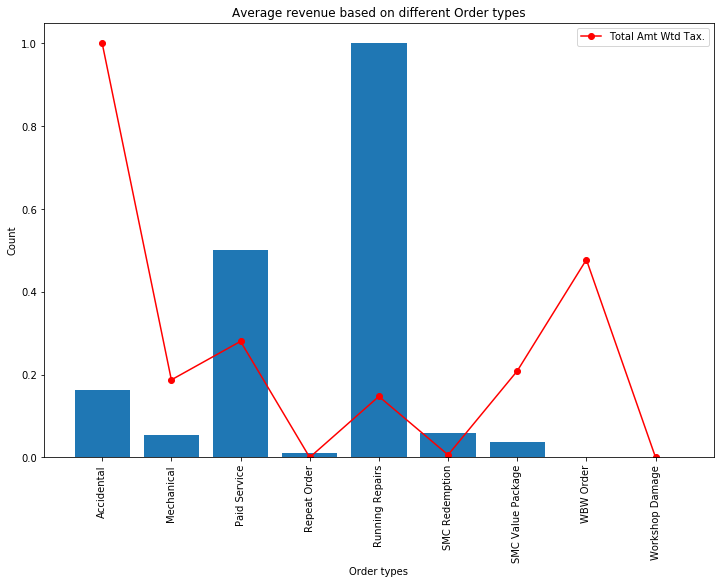

In [47]:
sc = MinMaxScaler()
revenue_make_count[['Total Amt Wtd Tax.','Total_orders']] = sc.fit_transform(revenue_make_count[['Total Amt Wtd Tax.','Total_orders']])


plt.figure(figsize=(12,8))
plt.bar(revenue_make_count['Order Type'], revenue_make_count['Total_orders'])
plt.plot(revenue_make_count['Order Type'], revenue_make_count['Total Amt Wtd Tax.'], color='red', marker='o')
plt.legend()
plt.title("Average revenue based on different Order types")
plt.xticks(rotation = 90)
plt.xlabel("Order types")
plt.ylabel("Count")

13) What is the most Order types at particular location? 

- Note: We will consider top 15 states.

In [48]:
district = modified_invoice_data['clean_District'].value_counts().head(15)
district = list(district.index)


most_car_loc = modified_invoice_data.copy()
most_car_loc = most_car_loc[most_car_loc['clean_District'].isin(district)]


most_car_loc = most_car_loc.groupby(['clean_District','Order Type'], as_index=False)['Job Card No'].count()
most_car_loc.head()

,clean_District,Order Type,Job Card No
0,Andhra Pradesh,Accidental,1461
1,Andhra Pradesh,Mechanical,517
2,Andhra Pradesh,Paid Service,3006
3,Andhra Pradesh,Repeat Order,28
4,Andhra Pradesh,Running Repairs,10197


In [49]:
most_car_loc = most_car_loc.groupby(['clean_District']).apply(lambda x: x.sort_values(["Job Card No"], ascending = False)).reset_index(drop=True)
most_car_loc = most_car_loc.groupby('clean_District').head(3)
most_car_loc.head(10)

,clean_District,Order Type,Job Card No
0,Andhra Pradesh,Running Repairs,10197
1,Andhra Pradesh,Paid Service,3006
2,Andhra Pradesh,Accidental,1461
7,Bihar,Running Repairs,1573
8,Bihar,Paid Service,1007
9,Bihar,Accidental,164
14,Delhi,Running Repairs,2353
15,Delhi,Accidental,914
16,Delhi,Paid Service,820
22,Gujarat,Running Repairs,11729


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

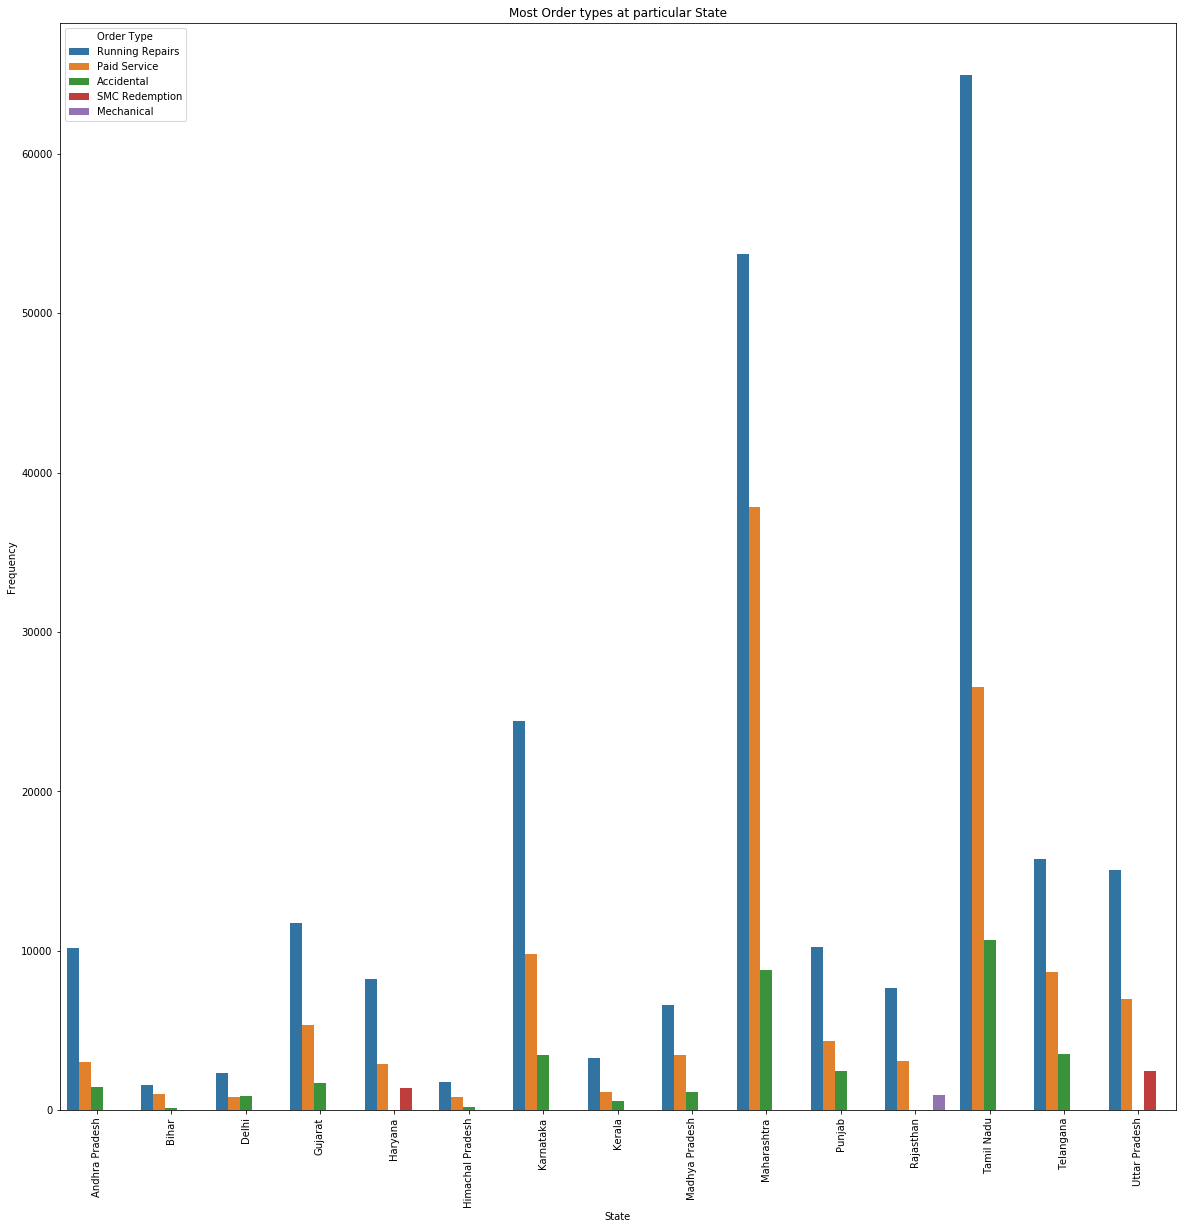

In [50]:
plt.figure(figsize=(20,20))
sns.barplot(x = 'clean_District', y = 'Job Card No', hue = 'Order Type', data = most_car_loc)
plt.title("Most Order types at particular State")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)

14) What is the average service time at particular location?

In [51]:
service_loc = modified_invoice_data.groupby(by = 'clean_District', as_index=False)['service_time'].mean()
service_loc.head()

,clean_District,service_time
0,Andhra Pradesh,94.46
1,Arunachal Pradesh,0.96
2,Assam,10.06
3,Bihar,116.00
4,Chandigarh,64.33


In [52]:
count_of_orders = pd.DataFrame(modified_invoice_data['clean_District'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['clean_District','Total_orders']

service_loc_count = service_loc.merge(count_of_orders, on = 'clean_District', how = 'left')
service_loc_count.head()

,clean_District,service_time,Total_orders
0,Andhra Pradesh,94.46,15700
1,Arunachal Pradesh,0.96,1
2,Assam,10.06,91
3,Bihar,116.00,2845
4,Chandigarh,64.33,1488


Text(0, 0.5, 'Count')

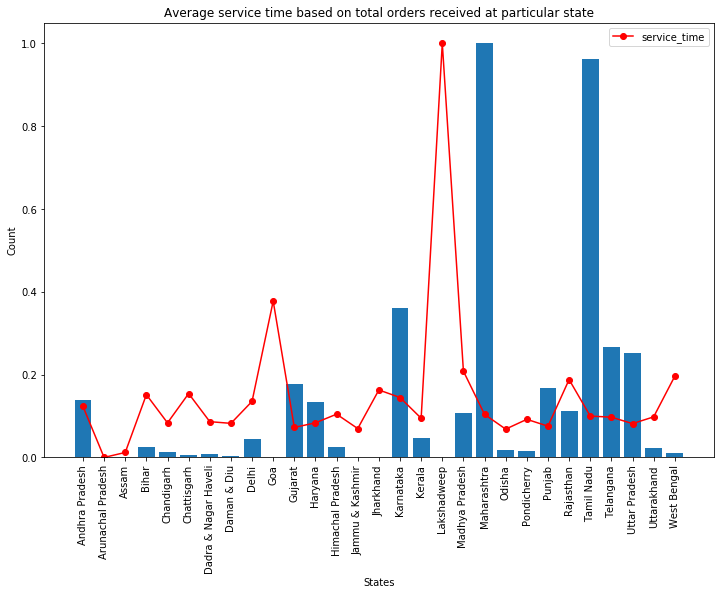

In [53]:
sc = MinMaxScaler()
service_loc_count[['service_time','Total_orders']] = sc.fit_transform(service_loc_count[['service_time','Total_orders']])


plt.figure(figsize=(12,8))
plt.bar(service_loc_count['clean_District'], service_loc_count['Total_orders'])
plt.plot(service_loc_count['clean_District'], service_loc_count['service_time'], color='red', marker='o')
plt.legend()
plt.title("Average service time based on total orders received at particular state")
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Count")

15) What is the service time for particular order type and revenue generated from it?

In [54]:
revenue_generated = modified_invoice_data.groupby('Order Type', as_index  = False)['Total Amt Wtd Tax.'].mean()
revenue_generated.head()

count_of_orders = pd.DataFrame(modified_invoice_data['Order Type'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['Order Type','Total_orders']

revenue_make_count = revenue_generated.merge(count_of_orders, on = 'Order Type', how = 'left')
revenue_make_count.head()


,Order Type,Total Amt Wtd Tax.,Total_orders
0,Accidental,17182.94,43966
1,Mechanical,3217.96,14721
2,Paid Service,4815.24,134023
3,Repeat Order,1.32,3042
4,Running Repairs,2531.98,268025


In [55]:
service_order = modified_invoice_data.groupby(by = 'Order Type', as_index=False)['service_time'].mean()
service_order.head()

,Order Type,service_time
0,Accidental,227.10
1,Mechanical,83.57
2,Paid Service,83.48
3,Repeat Order,78.98
4,Running Repairs,61.61


In [56]:
service_order_rev = revenue_make_count.merge(service_order, on = 'Order Type', how = 'left')
service_order_rev.head()


,Order Type,Total Amt Wtd Tax.,Total_orders,service_time
0,Accidental,17182.94,43966,227.10
1,Mechanical,3217.96,14721,83.57
2,Paid Service,4815.24,134023,83.48
3,Repeat Order,1.32,3042,78.98
4,Running Repairs,2531.98,268025,61.61


Text(0, 0.5, 'Count')

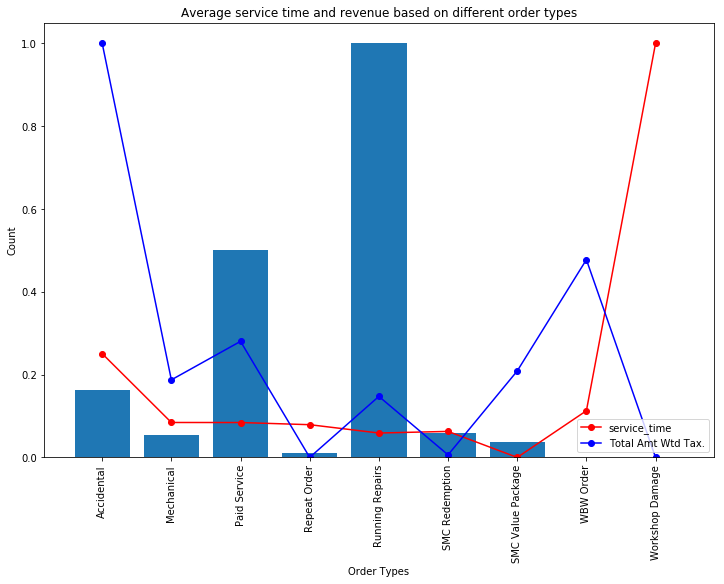

In [57]:
sc = MinMaxScaler()
service_order_rev[['service_time','Total_orders','Total Amt Wtd Tax.']] = sc.fit_transform(service_order_rev[['service_time','Total_orders','Total Amt Wtd Tax.']])


plt.figure(figsize=(12,8))
plt.bar(service_order_rev['Order Type'], service_order_rev['Total_orders'])
plt.plot(service_order_rev['Order Type'], service_order_rev['service_time'], color='red', marker='o')
plt.plot(service_order_rev['Order Type'], service_order_rev['Total Amt Wtd Tax.'], color='blue', marker='o')
plt.legend()
plt.title("Average service time and revenue based on different order types")
plt.xticks(rotation = 90)
plt.xlabel("Order Types")
plt.ylabel("Count")

16) What is the average revenue generated for different age of cars?

In [58]:
age_cars_rev = modified_invoice_data.groupby(['Age of cars'], as_index=False)['Total Amt Wtd Tax.'].mean()
age_cars_rev.head()

,Age of cars,Total Amt Wtd Tax.
0,1-3,3481.48
1,10-12,5869.33
2,13-15,5902.17
3,15-18,6104.73
4,4-6,4561.25


In [59]:
count_of_orders = pd.DataFrame(modified_invoice_data['Age of cars'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['Age of cars','Total_orders']
count_of_orders.head()

,Age of cars,Total_orders
0,4-6,182172
1,1-3,174179
2,7-9,78699
3,10-12,28879
4,13-15,12499


In [60]:
age_cars_rev = age_cars_rev.merge(count_of_orders, on = 'Age of cars', how = 'left')
age_cars_rev.head()

,Age of cars,Total Amt Wtd Tax.,Total_orders
0,1-3,3481.48,174179
1,10-12,5869.33,28879
2,13-15,5902.17,12499
3,15-18,6104.73,6097
4,4-6,4561.25,182172


In [61]:
service_order = modified_invoice_data.groupby(by = 'Age of cars', as_index=False)['service_time'].mean()
age_cars_rev = age_cars_rev.merge(service_order, on = 'Age of cars', how = 'left')
age_cars_rev.head()

,Age of cars,Total Amt Wtd Tax.,Total_orders,service_time
0,1-3,3481.48,174179,69.10
1,10-12,5869.33,28879,102.13
2,13-15,5902.17,12499,110.92
3,15-18,6104.73,6097,107.80
4,4-6,4561.25,182172,83.54


Text(0, 0.5, 'Count')

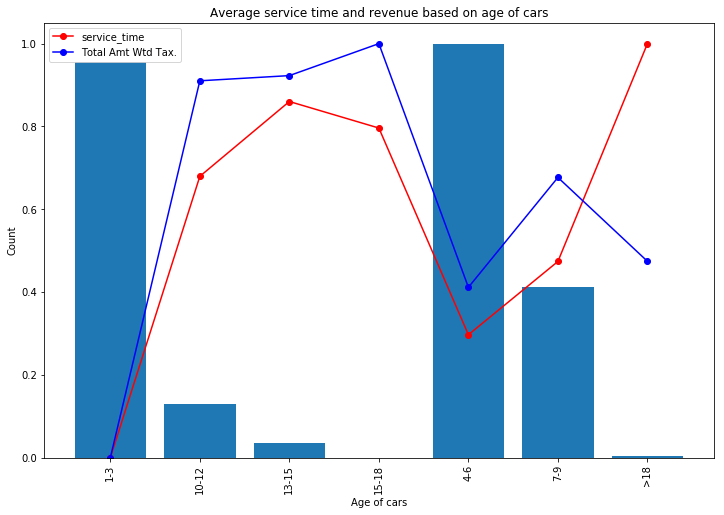

In [62]:
sc = MinMaxScaler()
age_cars_rev[['service_time','Total_orders','Total Amt Wtd Tax.']] = sc.fit_transform(age_cars_rev[['service_time','Total_orders','Total Amt Wtd Tax.']])


plt.figure(figsize=(12,8))
plt.bar(age_cars_rev['Age of cars'], age_cars_rev['Total_orders'])
plt.plot(age_cars_rev['Age of cars'], age_cars_rev['service_time'], color='red', marker='o')
plt.plot(age_cars_rev['Age of cars'], age_cars_rev['Total Amt Wtd Tax.'], color='blue', marker='o')
plt.legend()
plt.title("Average service time and revenue based on age of cars")
plt.xticks(rotation = 90)
plt.xlabel("Age of cars")
plt.ylabel("Count")

17) Which season receives most orders and revenue generated from it?

In [63]:
season_rev = modified_invoice_data.groupby('Season', as_index=False)['Total Amt Wtd Tax.'].mean()
season_rev.head()

,Season,Total Amt Wtd Tax.
0,Autumn,4287.76
1,Monsoon,4392.87
2,Summer,4556.26
3,Winter,4420.69


In [64]:
count_of_orders = pd.DataFrame(modified_invoice_data['Season'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['Season','Total_orders']
count_of_orders.head()

,Season,Total_orders
0,Monsoon,189050
1,Summer,119964
2,Winter,101601
3,Autumn,78714


In [65]:
season_rev = season_rev.merge(count_of_orders, on = 'Season', how='left')
season_rev.head()

,Season,Total Amt Wtd Tax.,Total_orders
0,Autumn,4287.76,78714
1,Monsoon,4392.87,189050
2,Summer,4556.26,119964
3,Winter,4420.69,101601


Text(0, 0.5, 'Count')

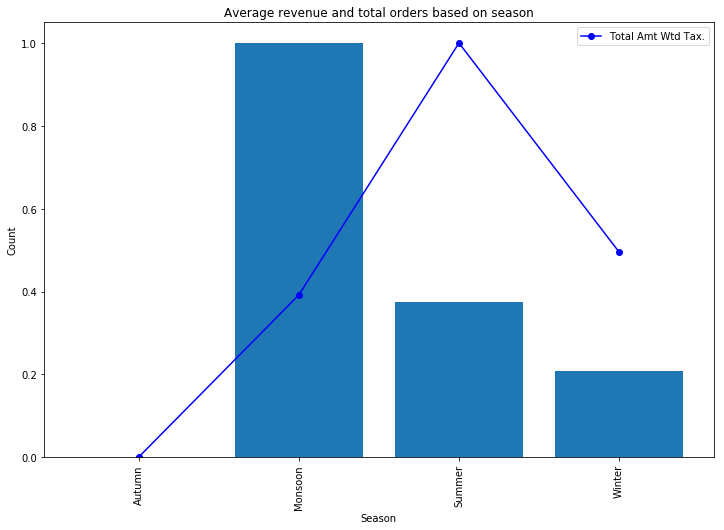

In [66]:
sc = MinMaxScaler()
season_rev[['Total_orders','Total Amt Wtd Tax.']] = sc.fit_transform(season_rev[['Total_orders','Total Amt Wtd Tax.']])


plt.figure(figsize=(12,8))
plt.bar(season_rev['Season'], season_rev['Total_orders'])
plt.plot(season_rev['Season'], season_rev['Total Amt Wtd Tax.'], color='blue', marker='o')
plt.legend()
plt.title("Average revenue and total orders based on season")
plt.xticks(rotation = 90)
plt.xlabel("Season")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

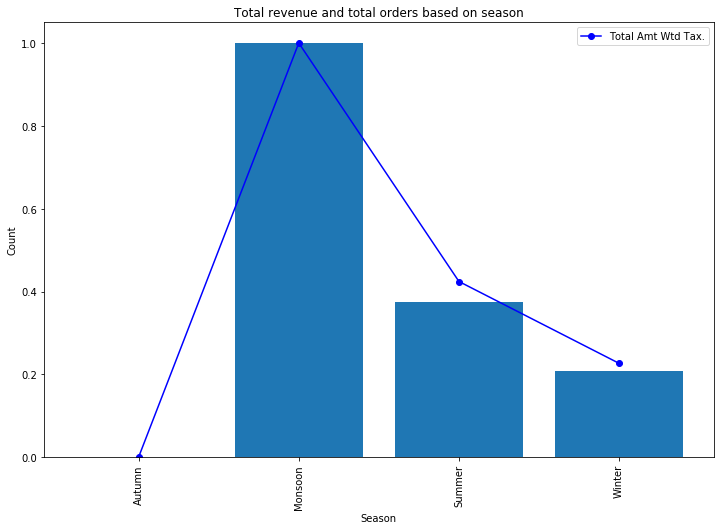

In [67]:
## Highest revenue
season_rev = modified_invoice_data.groupby('Season', as_index=False)['Total Amt Wtd Tax.'].sum()

count_of_orders = pd.DataFrame(modified_invoice_data['Season'].value_counts())
count_of_orders.reset_index(inplace = True)
count_of_orders.columns = ['Season','Total_orders']

season_rev = season_rev.merge(count_of_orders, on = 'Season', how='left')

sc = MinMaxScaler()
season_rev[['Total_orders','Total Amt Wtd Tax.']] = sc.fit_transform(season_rev[['Total_orders','Total Amt Wtd Tax.']])


plt.figure(figsize=(12,8))
plt.bar(season_rev['Season'], season_rev['Total_orders'])
plt.plot(season_rev['Season'], season_rev['Total Amt Wtd Tax.'], color='blue', marker='o')
plt.legend()
plt.title("Total revenue and total orders based on season")
plt.xticks(rotation = 90)
plt.xlabel("Season")
plt.ylabel("Count")

18) What are the order types for particular season?

- Note: We can see highest revenue generated is in monsoon and most order are received in monsoon.

In [68]:
modified_invoice_data.head()

,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars,Month,Year,Day,Season
0,4,Retail,E4981,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai,13-15,4,2012,1,Summer
1,5,Retail,10,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai,7-9,4,2012,2,Summer
2,6,Retail,7,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad,10-12,4,2012,2,Summer
3,7,Retail,11,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik,10-12,4,2012,2,Summer
4,8,Retail,E12096,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik,10-12,4,2012,2,Summer


In [69]:
order_season = modified_invoice_data.groupby(['Season','Order Type'], as_index=False)['Job Card No'].count()
order_season.head()

,Season,Order Type,Job Card No
0,Autumn,Accidental,6931
1,Autumn,Mechanical,5
2,Autumn,Paid Service,22023
3,Autumn,Repeat Order,484
4,Autumn,Running Repairs,45384


In [70]:
order_season = order_season.sort_values(by = ['Season','Order Type'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

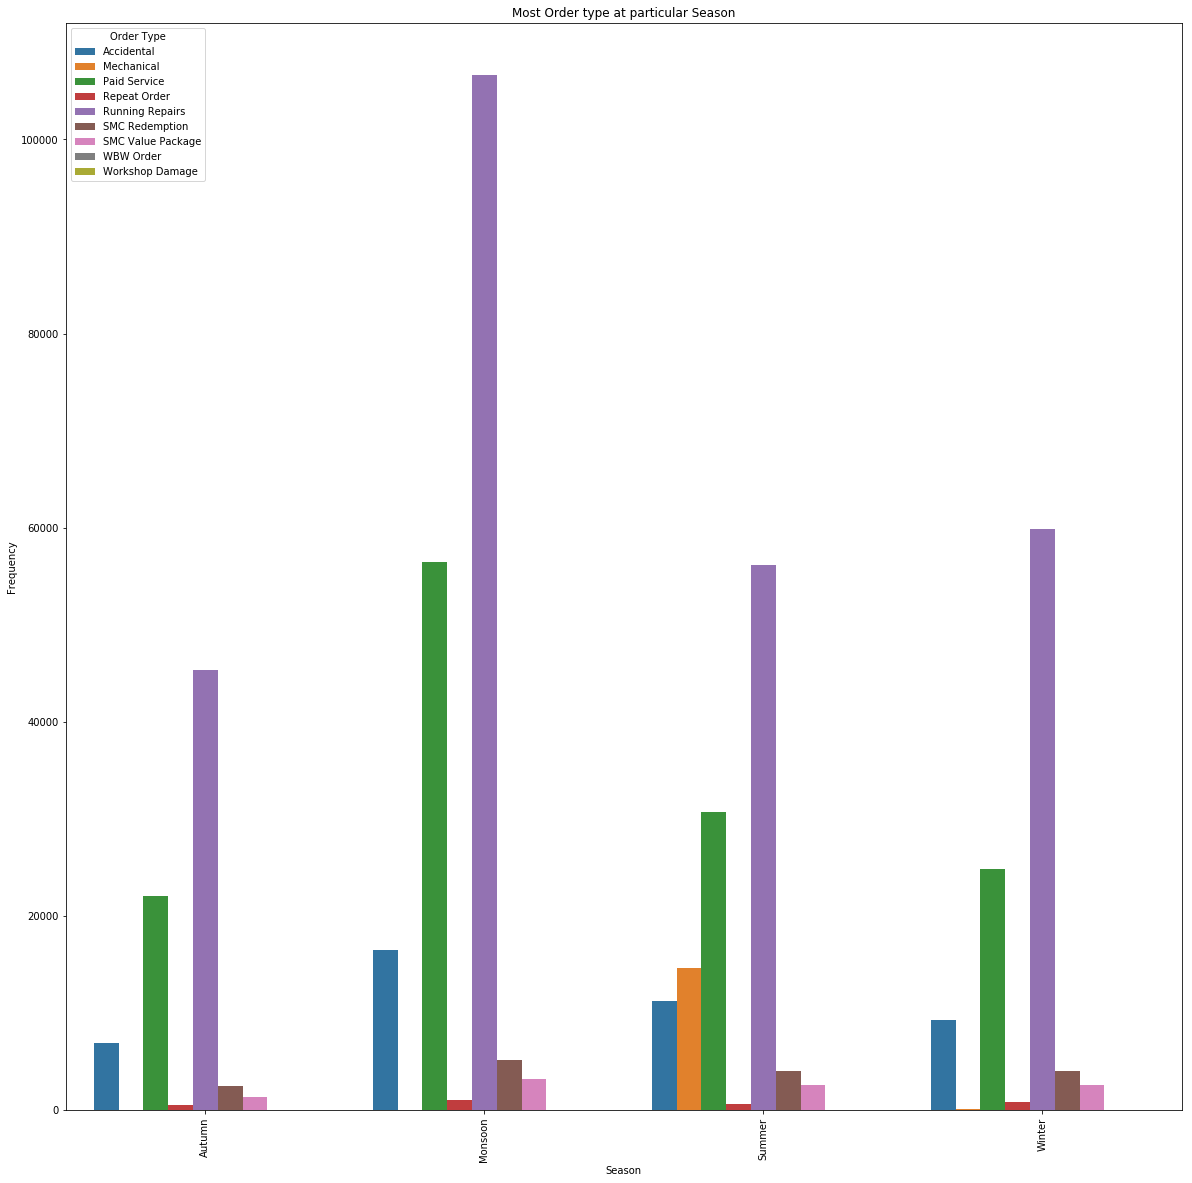

In [71]:
plt.figure(figsize=(20,20))
sns.barplot(x = 'Season', y = 'Job Card No', hue = 'Order Type', data = order_season)
plt.title("Most Order type at particular Season")
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)

In [72]:
avg_rev =  modified_invoice_data.groupby(['Season','Order Type'], as_index=False)['Total Amt Wtd Tax.'].mean()
avg_rev = avg_rev.sort_values(by = ['Season','Order Type'])

In [73]:
avg_rev.head()

,Season,Order Type,Total Amt Wtd Tax.
0,Autumn,Accidental,16753.66
1,Autumn,Mechanical,21595.52
2,Autumn,Paid Service,4621.84
3,Autumn,Repeat Order,0.00
4,Autumn,Running Repairs,2497.43


Text(0.5, 1.0, 'Average revenue for particular Order type at particular Season')

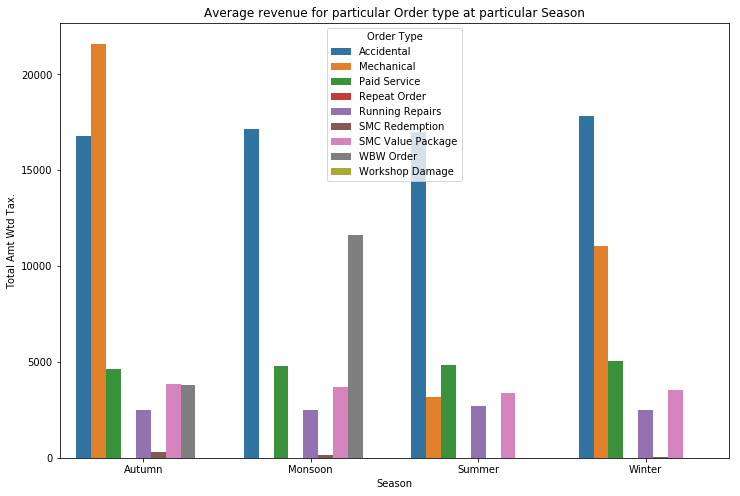

In [74]:
## Revenue from each order type for particular season
plt.figure(figsize=(12,8))
sns.barplot(x = 'Season', y = 'Total Amt Wtd Tax.', hue = 'Order Type', data = avg_rev)
plt.title("Average revenue for particular Order type at particular Season")

19) What is average service time and average revenue year wise?

In [75]:
modified_invoice_data.head()

,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars,Month,Year,Day,Season
0,4,Retail,E4981,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai,13-15,4,2012,1,Summer
1,5,Retail,10,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai,7-9,4,2012,2,Summer
2,6,Retail,7,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad,10-12,4,2012,2,Summer
3,7,Retail,11,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik,10-12,4,2012,2,Summer
4,8,Retail,E12096,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik,10-12,4,2012,2,Summer


In [76]:
ser_year = modified_invoice_data.groupby(['Year'], as_index=False)['service_time'].mean()
rev_year = modified_invoice_data.groupby(['Year'], as_index=False)['Total Amt Wtd Tax.'].mean()

In [77]:
ser_rev_year = ser_year.merge(rev_year, on = 'Year', how = 'left')

In [78]:
ser_rev_year[['service_time','Total Amt Wtd Tax.']] = sc.fit_transform(ser_rev_year[['service_time','Total Amt Wtd Tax.']])
ser_rev_year.head()

,Year,service_time,Total Amt Wtd Tax.
0,2012,0.36,0.95
1,2013,0.00,0.00
2,2014,0.07,0.05
3,2015,0.84,1.00
4,2016,1.00,0.19


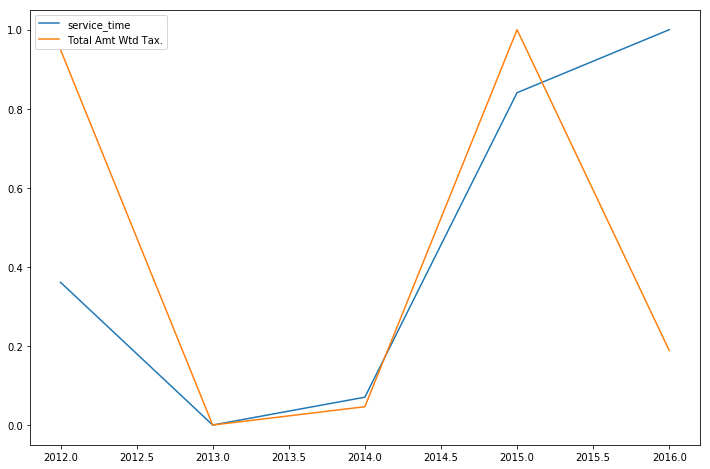

In [79]:
plt.figure(figsize=(12,8))
plt.plot(ser_rev_year['Year'],ser_rev_year['service_time'])
plt.plot(ser_rev_year['Year'], ser_rev_year['Total Amt Wtd Tax.'])
plt.legend()

- Note: We can see decline in revenue 

20) What is the Total revenue and Total orders received yearly?

In [80]:
rev_year = modified_invoice_data.groupby(['Year'], as_index=False)['Total Amt Wtd Tax.'].sum()
order_year = modified_invoice_data.groupby(['Year'], as_index = False)['Job Card No'].count()

In [81]:
rev_order_year = rev_year.merge(order_year, on = 'Year', how = 'left')
rev_order_year[['Total Amt Wtd Tax.', 'Job Card No']] = sc.fit_transform(rev_order_year[['Total Amt Wtd Tax.', 'Job Card No']])
rev_order_year.columns = ['Year', 'Total Revenue', 'Total Orders']
rev_order_year.head()

,Year,Total Revenue,Total Orders
0,2012,0.00,0.00
1,2013,0.19,0.21
2,2014,0.42,0.44
3,2015,0.69,0.61
4,2016,1.00,1.00


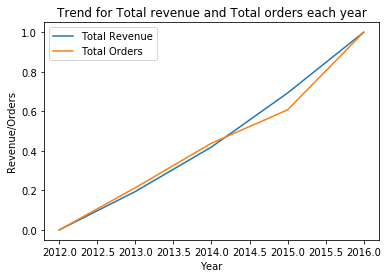

In [82]:
plt.plot(rev_order_year['Year'], rev_order_year['Total Revenue'])
plt.plot(rev_order_year['Year'], rev_order_year['Total Orders'])
plt.title("Trend for Total revenue and Total orders each year")
plt.xlabel("Year")
plt.ylabel("Revenue/Orders")
plt.legend()

21) Which are top 50 highest revenue generating plants and how many of the top revenue generating plants are non functional?

In [83]:
non_functinal_plants_copy = non_functinal_plants.copy()
non_functinal_plants.head()

,JobCard Date,Plant Name1,days
Plant,,,
BC11,2013-03-28,ANDHERI,1313
BC04,2014-03-01,BALANAGAR,975
BC02,2015-03-20,PUNE,591
BC27,2015-03-24,GT ROAD - LUDHIANA,587
BC21,2015-05-21,EDAPPALLY - KOCHI,529


In [84]:
plant_id = list(non_functinal_plants.index)

In [85]:
plant_rev = modified_invoice_data.copy()
plant_rev[['Plant Name1','Plant','Total Amt Wtd Tax.']]

operation = {'Plant Name1': 'first', 'Total Amt Wtd Tax.': 'sum'}
plant_rev = plant_rev.groupby(['Plant'], as_index=False).agg(operation)
plant_rev = plant_rev.sort_values(by = 'Total Amt Wtd Tax.', ascending = False).head(50)
plant_rev.head()

,Plant,Plant Name1,Total Amt Wtd Tax.
2,BC03,NASHIK,108768196.83
5,BC06,GUINDY,106219156.84
6,BC07,NERKUNDRAM,83804365.80
4,BC05,MADEENAGUDA,75387855.25
0,BC01,THANE,61608206.75


In [86]:
non_functinal_plants.reset_index(inplace=True)
non_functinal_plants.head()

,Plant,JobCard Date,Plant Name1,days
0,BC11,2013-03-28,ANDHERI,1313
1,BC04,2014-03-01,BALANAGAR,975
2,BC02,2015-03-20,PUNE,591
3,BC27,2015-03-24,GT ROAD - LUDHIANA,587
4,BC21,2015-05-21,EDAPPALLY - KOCHI,529


In [87]:
high_non_plant = list(plant_rev[plant_rev['Plant'].isin(plant_id)]['Plant'])
high_non_plant

['BC03',
 'BC06',
 'BC05',
 'BC01',
 'BC26',
 'BC17',
 'BC08',
 'BC15',
 'BC16',
 'BC23',
 'BC13',
 'BC20',
 'BC28',
 'BC02',
 'BC18',
 'BC04',
 'BC12',
 'BC33',
 'BC19',
 'BC24',
 'BC29',
 'BC25',
 'BC22',
 'BC21',
 'BC11',
 'BC32']

In [88]:
def assign_colour(x):
    if x in high_non_plant:
        return 'R'
    else:
        return 'B'

plant_rev['Colour'] = plant_rev['Plant'].apply(lambda x: assign_colour(x))
plant_rev.head()

,Plant,Plant Name1,Total Amt Wtd Tax.,Colour
2,BC03,NASHIK,108768196.83,R
5,BC06,GUINDY,106219156.84,R
6,BC07,NERKUNDRAM,83804365.80,B
4,BC05,MADEENAGUDA,75387855.25,R
0,BC01,THANE,61608206.75,R


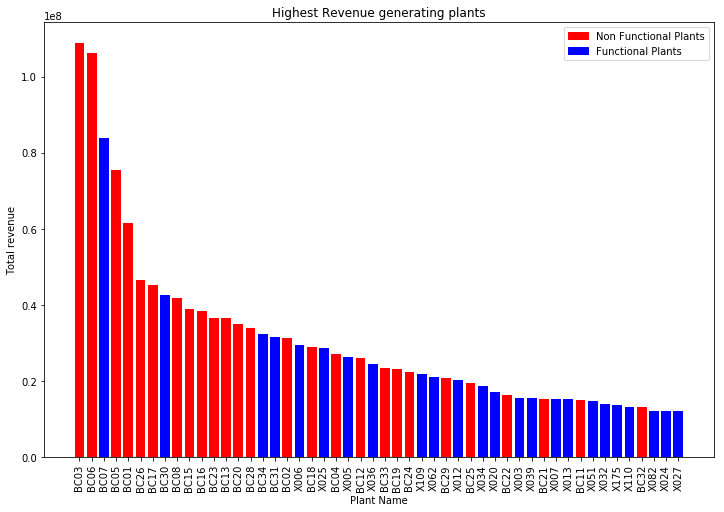

In [89]:
import matplotlib.patches as mpatches

colors  = {'R': 'red', 'B':'blue'}

plt.figure(figsize=(12,8))
plt.bar(plant_rev['Plant'], plant_rev['Total Amt Wtd Tax.'], color = plant_rev['Colour'].apply(lambda x: colors[x]))
plt.title("Highest Revenue generating plants")
plt.xlabel("Plant Name")
plt.ylabel("Total revenue")
plt.xticks(rotation = 90)
red_patch = mpatches.Patch(color='red', label='Non Functional Plants')
blue_patch = mpatches.Patch(color='blue', label='Functional Plants')
plt.legend(handles = [red_patch,blue_patch])
plt.show()